# "Microsoft Movies" - A Market Entry Proposal

## Getting Started

Based on the Microsoft's interest in seeing new players create original content and making moves into the movie industry, I've drafted several general questions that they might consider even before approaching the data. Generally, an organization like Microsoft should perform SWOT (Strengths, Weaknesses, Opportunities, and Threats) analysis before diving head first into a new product (like movies). 

Without broadening the scope too much, brief items in these categories might include the following:

1. **Strengths** - technology company, Office suite dominance, widespread brand recognition (e.g., Xbox)
2. **Weaknesses** - Little artistic experience, no Hollywood experience
3. **Opportunities** - A lot of stay-at-home TV watching, previous competitors' success rates/surface-level data
4. **Threats** - Competition from big-name, thoroughly experienced companies like Netflix, Amazon, HBO, Disney, etc.; external blocks (theaters, distributors, platforms, pandemics)

## Business Understanding

### Analysis Question Brainstorming

1. Scope - does box office data capture the full extent of the potential opportunity available in the movie industry? Are we looking at domestic or global success? What specific factors are contributing to Microsoft's desire to make moves into the industry, and what other relevant data should be made available?

2. Accuracy - is the data we have accurate? Specifically, how recently was it updated? Importantly, given the new covid-19 reality, are there enough localized intervals of data to be able to understand how both the closing and opening of governments has impacted / will impact the industry before making such a large investment?

3. Delivery - What is the breakdown of delivery methods for new movies? Specifically, do most come out to streaming subscriptions, pay-to-download, straight-to-DVD, big-name theaters (AMC, Regal...), local theaters? Is there a higher ROI on any of these?

4. Consumer - Who is the target audience? What age group spends the most money? What age ratings of movies have the most views? What is the correlation breakdown for movie ratings vs. views vs. medium presented? In terms of original content production, what is the most effective way to reach them? I.e., where do they/would they watch movies (phone, tablet, TV, theater, etc.) and what is the optimal content length for each of those media

5. Content - Who are the most successful actors in the industry, and do certain of them perform better together? What is the best "product mix" of genres to start out with? What optimal movie length has the highest rating (is there a correlation)? Within those genres, who are the most successful directors in terms of volume of output, highest ratings? What is their value in terms of increased rating per dollar spent on them? I.e., which directors would provide the biggest ROI?

6. Cost - What is the optimal amount to spend? What is the general range of funds spent on generating successful movies? Is there a correlation between dollars spent increase in rating?

### Focusing Business Understanding

The questions above seek a wide scope of analysis that Microsoft should perform before investing in movies and the entertainment industry. The scope of this project, then, is just a small piece of the required questions before investment. Given Microsoft's giant size and revenue as one of the most successful tech companies, it should be fair to assume that Microsoft wants to put out a very successful movie, in the eyes of the viewer. For this reason, success will be defined as a movie with a high rating (specific numbers dependent upon what the data look like). Additionally, while budget should not be a constraint, Microsoft should know as early as possible how much this project will cost, in order to begin effectively allocating resources and saving up. Similarly, while movie length is just one small piece of the larger picture, Microsoft should know which lengths of movie to produce in order to begin pitching the project to a creative team. So, given the data provided, we will focus on two small parts of the cost and content subsets of the data. By analyzing this data, we will seek to answer the following questions:

**1. What budget range should Microsoft expect to set to achieve a successful (read: top-rated) movie?**

**2. What length movie should Microsoft expect to create to achieve successful (read: top-rated) movie?**

## Data Understanding

In order to answer the two business understanding questions, the data required are:

1. Title - in order to identify the movie across datasets
2. Budget
3. Length
4. Rating

Several of the datasets have the information we seek in their title, specifically "IMDB Title Basics", "IMDB Title Ratings", "RT Movie Info",. "RT Reviews", and "TN Movie Budgets". So we'll import the headers of just a few to see which specific ones have the relevant data. For this specific analysis, we've chosen to work with IMDB data (Title Basics, Title Ratings) and The Numbers data (Movie Budgets). In focusing on these datasets, we must acknowledge off the bat that this is but a small piece and several other data sources should be consulted in addition to these two to make an accurate assessment of the two business questions we've proposed.

## Data Preparation

First, we'll start by importing all the tools that we will need for analysis later in the notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

Within the IMDB Data, in order to narrow this information down even further, we'll have to peek inside the data to determine if we've found some data we were looking for.

#### First Dataset: IMDB Title Basics

Observing the column names of the IMDB Title Basics dataframe below provides two of the four relevant pieces of information we established as necessary based on the business needs: Primary Title and Runtime in Minutes. Great. We'll move on to the next set.

In [2]:
IMDBTitleBasicsdf = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
###Import IMDB 'Basics' and 'Ratings' to 1) identify how the titles are indexed, and 2) link the titles to the ratings

In [3]:
IMDBTitleBasicsdf.head(2)
##Use head function to get tabular structural overview

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [4]:
IMDBTitleBasicsdf.info()
###Get basic information about the IMDB column names to determine how the data is stored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### Second Dataset: IMDB Title Ratings

I suspect IMDB Title Ratings has information about the ratings for each Title, so we'll import that:

In [5]:
IMDBTitleRatingsdf = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
###Use pandas to import Title Ratings dataset.
###Save dataframe variable for easy reference later.

In [6]:
IMDBTitleRatingsdf.head(2)
##Use head function to get tabular structural overview

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [7]:
IMDBTitleRatingsdf.info()
###Use the pandas info function to get general information about this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This dataframe has the Average Rating as well as a number of votes (gives us specific information about the rating, which we might be able to use later). However, off the bat I've noticed two issues: There is no "Title" column, and the "non-null" count of items here is about half of that in the previous Title Basics dataframe. We'll address these issues later.

For now, I want to finish finding the data for the last data requirement we established earlier: Budgets.

#### Third Dataset: Movie Budgets

We'll import one more dataset in order to determine the general expected budget: 

In [8]:
budgetsdf = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',parse_dates = True) ##Bring in the budget data!

In [9]:
budgetsdf.head() ##Observe the head, see what it looks like

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Off the bat, it looks like we have some numeric data saved as string types. For example, the release_date column has commas and spaces in it, and the columns related to money all have columns and dollar signs in them. So I'll get the info on these columns in order to see...

In [10]:
budgetsdf.info() ##Use info function to look at datatypes for columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


So while this data appears to be complete, it is not clean since it's all saved as objects (except for the ID column...which we probably don't need!). So the next step is to convert these strings into numbers. For simplicity's sake, I'm going to eliminate the dates. Keep in mind that in doing this, I am introducing comparison errors due to things like inflation. With broader scope, perhaps it would be helpful to only analyze the most recent years, or perhaps all years to determine how the release date impacts the budget or the gross income. For now, we'll only import the movie name, and the production budget - hopefully we will be able to find enough overlap in data to be able to connect this with the IMDB data and analyze.

In [11]:
MovieBudgets = budgetsdf[['id','movie', 'production_budget']] ##keep only the movie and production budget data 
                                                    ##since those are the only relevant pieces of information given our specific business questions

In [12]:
MovieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
dtypes: int64(1), object(2)
memory usage: 135.6+ KB


In [13]:
##We still need to convert the strings into floats or integers in order to be able to analyze

##This function removes all the dollar signs
MovieBudgets.loc[:, "production_budget"] = MovieBudgets['production_budget'].str.replace('[,$]','')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
##Now we'll convert the budget column data from a string to a float so we can graph/analyze later:
MovieBudgets.loc[:, 'production_budget'] = MovieBudgets['production_budget'].astype(float).values

In [15]:
MovieBudgets.head()

,id,movie,production_budget
0,1,Avatar,425000000.0
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0
2,3,Dark Phoenix,350000000.0
3,4,Avengers: Age of Ultron,330600000.0
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0


In [16]:
MovieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.6+ KB




So now we have 3 sources of data imported:
1. IMDB Title Basics - will help us identify the **Title** of the movies referenced in the IMDB documents, and also provide the **Run Time** of each movie.
2. IMDB Title Ratings - will tell us the **Ratings** of each movie title, and 
3. Movie Budgets - will help us answer the question of what **Budget** to expect to set us how much was spent to create some of these movies.

Analysis of these data points will allow us to answer the business questions proposed.



### Merge the Data
In order to successfully compare the data, we need to first ensure that all the data is properly aligned and "speaking the same language". This will require merging the datasets into one and ensuring enough exists for overlap.


In terms of merging the IMDB data, we will likely be able to use the 'tconst' column as an index in order to link the two IMDB dataframes and understand which movies have which ratings, but I want to be sure. That will give us the ratings, title, and view length. So I'll view the headers for both IMDB dataframes:

In [17]:
IMDBTitleBasicsdf.head() ##View headers to see what information is contained in the columns listed previously

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
IMDBTitleRatingsdf.head()  ##View headers to see what information is contained in the columns listed previously

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Before potentially merging these datasets, I'm going to ensure that the 'tconst' variable is usable as an index through which to merge by determining that it's unique for each title, and unique for each rating in the separate datasets.

This may or may not help us determine the gap between the number of indices available for rating and title.

In [19]:
##Check the shape of the data to see how many rows there are.
IMDBTitleBasicsdf.shape

(146144, 6)

In [20]:
##We double-check in these cells to see if there are duplicate values in tconst, or if we can use it for index later.

In [21]:
IMDBTitleBasicsdf['tconst'].value_counts()

tt3343694    1
tt6277814    1
tt3115910    1
tt6281566    1
tt6070344    1
            ..
tt8475882    1
tt1440136    1
tt9718574    1
tt2959616    1
tt9639274    1
Name: tconst, Length: 146144, dtype: int64

In [22]:
##Since length and value counts for tconst match, we know that there are no duplicate values.

In [23]:
##Check the length of title ratings dataframe to compare against value counts for tconst, in order to ensure no duplicates
IMDBTitleRatingsdf.shape

(73856, 3)

In [24]:
IMDBTitleRatingsdf['tconst'].value_counts()

tt6445396    1
tt1546036    1
tt7264292    1
tt2234064    1
tt7791496    1
            ..
tt5361064    1
tt4823494    1
tt2856930    1
tt3521334    1
tt9639274    1
Name: tconst, Length: 73856, dtype: int64

In [25]:
##Since length of tconst value counts is equal to length of values in dataframe shape, values are unique, so we can merge

Since we've checked both dataframes and ensured that there are no duplicates for 'tconst' in either Title Basics or Title Ratings, we can confidently merge the two dataframes using 'tconst' as our merging key. We will create a new dataframe called IMDBdf using pandas merge method containing all the data that intersects in both dataframes on the key 'tconst'.

In [26]:
IMDBdf = pd.merge(IMDBTitleBasicsdf, IMDBTitleRatingsdf, how = 'inner', on = 'tconst')
##Merge the data, using variable IMDBdf as new dataframe. Use merge function: (left dataframe, right dataframe,\
##how = inner since we want it on intersection, on = tconst to specify exactly which column)

In [27]:
IMDBdf.info() ##Check the new dataframe to ensure it merged as desired

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [28]:
 IMDBdf.head() ##View the head of the data to ensure accuracy

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


To summarize the data collected, we have two sets:
IMDBdf
Budgets

Keeping our business understanding questions in mind (ideal movie length for a high rating, budget range for high rating), we can get the ideal length out of the IMDBdf data and then the budget range per rating out of a merged dataframe. So that we're only working with one dataframe before performing any analysis, I'm going to merge the IMDBdf with Budgets.

In [29]:
Budgets = MovieBudgets.copy()

In [30]:
##We need to find a way to merge the two dataframes. Technically, there is no overlapping header,
##but since Budgets['movie'] appears to be te same as IMDBdf['primary_title'],
##we'll merge rename the columns in order to have a key with which to merge.
Budgets.rename(columns={'movie': 'primary_title'}, inplace = True) ##Rename movie column to primary_title to match IMDBdf dataframe
Budgets.head() ##double-check new column name

,id,primary_title,production_budget
0,1,Avatar,425000000.0
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0
2,3,Dark Phoenix,350000000.0
3,4,Avengers: Age of Ultron,330600000.0
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0


In [31]:
IMDBdf.head(2) ##confirm again that the IMDBdf primary_title column is written/formatted the same way

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [32]:
##Create new dataset called 'AllMovies', which contains the merged data from IMDBdf and Budgets

AllMovies =  IMDBdf.merge(Budgets, how='inner', on='primary_title')
###Create new variable called AllMovies
###Use pandas merge function on IMDBdf dataframe.
###Use Budgets as first argument- the dataframe which is being merged - not a string!!! Do not use quotations. 
###Define how argument as string 'inner', so that we only keep the data which intersects between the two sets,
###as opposed to using string 'outer', which will result in null values being created.
###Define on argument as string 'primary_title' - the column on which we want to merge the data. 
AllMovies.head(5) ##Let's see what we have!

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000.0
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,21,200000.0
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,200000.0
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,25000000.0


### Exploratory Data Analysis

### Initial Observations


So now we have just one dataset from which we need to extract information and perform analysis. Before performing further analysis we should observe the dataset. There are several issues to notice off the bat:

1. *Huge size reduction* - This dataframe contains 2875 rows which is around 71,000 fewer than the IMDBdf dataset, and about half the size of the Budgets dataset. While this may make sense for several reasons (not every movie may have been rated on IMDB, there may be possible name mismatches, etc.) we must acknowledge that we are intentionally further limiting the scope of the data we analyze. Perhaps with more time we might explore ways in which to reconcile these size differences and mitigate the risk for errors in our analysis.


2. *Null Values* - Several null values appear across columns in AllMovies dataset. Not all of them are particularly relevant (i.e., not concerned about missing genres); however, some of the columns which have information directly relevant to our business questions are missing data (e.g., Richard III has a null value for the runtime). For these null values, I will only eliminate the datapoints if they are null in both runtime AND budget - since I don't want to exclude potentially value information in either budget or runtime analysis if I don't have to. 


3. *Duplicates* - From the head of the data, I can tell that there will be duplicates across several rows. This may take a bit of investigation, but we want to ensure we're not double-counting some movies and not others - this will impact the weighting and distribution of our results. 





### Visualizations

In order to answer our business questions in a way that is efficient for the stakeholders and decisionmakers, we need to show clean visualizations. The goal in preparing each visualization is to be concise and quickly summarize the data, without misleading or deceiving our target audience. To that end, I'll create visualizations in the following way:

1. Distributions - I want to know the general range of what to expect from all movies. Since we're using ratings as our basis for success, we must know what the distribution of ratings for movies looks like, and what it will take for Microsoft to create a first movie that makes an impression with staying power.

2. Relationship - In order to establish a good budget range and movie length range, we need to understand the relationship between these two variables and ratings. We'll create charts to see how both budget and length relate to the higher rated movies.

We'll use seaborn in order to understand this data a little better. To make the most effective usage of seaborn, we must ensure we are providing the cleanest datasets possible. 


For the sake of simplicity, we'll drop duplicates and excess columns, using the pandas subset parameter to specify primary title. One caveat here is that in doing so, it's possible that we will eliminate different movies that happen to go by the same name. Another possibility is that, based on the columns from the Movie Budgets database, duplicates might represent foreign and domestic data from the films. For the sake of simplicity, we'll simply acknowledge these potentials and move on to derive insights.

In [33]:
##For the sake of simplicity, drop duplicates, excess columns

NoDupes = AllMovies.drop_duplicates(subset = 'primary_title') 
#Use drop duplicates method for pandas dataframe to eliminate duplicate entries
#Use optional subset method to specify primary title in order to eliminate duplicate title names

Movies = NoDupes.drop(axis=1, columns = ['tconst','original_title','start_year','id','genres'])
#Drop excess columns

In [34]:
#Convert production budget row to fewer numbers to increase readability
##Note in whatever legend that production_budget unit is millions of dollars.

MoviesClean = Movies.dropna(axis=0, subset=['averagerating'])
MoviesClean

,primary_title,runtime_minutes,averagerating,numvotes,production_budget
0,Foodfight!,91.0,1.9,8248,45000000.0
1,The Overnight,88.0,7.5,24,200000.0
3,On the Road,124.0,6.1,37886,25000000.0
6,The Secret Life of Walter Mitty,114.0,7.3,275300,91000000.0
7,A Walk Among the Tombstones,114.0,6.5,105116,28000000.0
...,...,...,...,...,...
2870,Richard III,NaN,9.1,28,9200000.0
2871,Heroes,88.0,7.3,7,400000.0
2872,Push,92.0,7.3,33,38000000.0
2873,Unplanned,106.0,6.3,5945,6000000.0


In [35]:
import seaborn as sns ##import seaborn package in order to create visualizations from dataframes

Briefly, I want to see the number of votes for the average rating (this information came from the imdb information) distribution, and eliminate the bottom end outliers, to the extent possible. Again, Microsoft should not be focusing on data based on a few perceptions, but rather  high number of votes. This is especially important since we defined our success as dependent on how well the movie is received (i.e., rating).

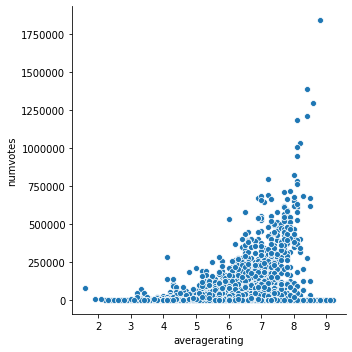

In [36]:
sns.relplot(x='averagerating', y='numvotes', data = MoviesClean)
##

We can make several quick observations looking at the data here:

Every rating has several points around the 0 mark of number of votes - this makes sense since theoretically one person could rate one movie with a 1 or 10 and impact our dataset.

We can see a vaguely exponential increase in the number of votes as movies get better. This makes sense as well - we're more inclined to spend the time to rate movies that we really enjoyed -  who wants to waste even more time rating a movie that they thought was a waste of time in the first place?

Finally, while most of the ratings aggregate between 5 and 8, we can see that there are several movies that have high ratings, and a large number of votes in the 7+ ratings range, with a significant increase in number of votes just under the 8.0 rating marker and slightly after it as well. We'll come back to this later.

In [37]:
MoviesClean.describe()

,runtime_minutes,averagerating,numvotes,production_budget
count,2072.000000,2126.000000,2.126000e+03,2.126000e+03
mean,103.881757,6.231232,8.212615e+04,3.716387e+07
std,18.760685,1.142910,1.465604e+05,5.112990e+07
min,5.000000,1.600000,5.000000e+00,1.400000e+03
25%,91.000000,5.600000,7.930000e+02,5.000000e+06
50%,102.000000,6.300000,2.344900e+04,1.825000e+07
75%,114.000000,7.000000,9.486275e+04,4.500000e+07
max,180.000000,9.200000,1.841066e+06,4.250000e+08




Looking at the visual data first we discover that there will be outliers (or missing data) for the number of votes required for success.
1. 75%+ average rating?, min/mx on public rating for context
update legends, title, axes, etc.|

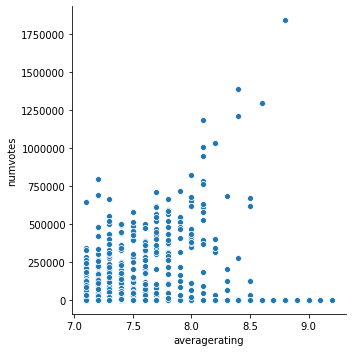

In [38]:
##Define High rated as observations which have ratings greater than 7
HighRated = MoviesClean[MoviesClean['averagerating'] > 7]
sns.relplot(x='averagerating', y='numvotes', data = HighRated)

In [39]:
##Define Highest Rated as observations that have at least 100 votes.
HighestRated = HighRated[HighRated['numvotes'] > 100]
HighestRated.describe()

,runtime_minutes,averagerating,numvotes,production_budget
count,416.000000,416.000000,4.160000e+02,4.160000e+02
mean,116.331731,7.503846,2.141288e+05,5.037681e+07
std,19.900489,0.363762,2.430505e+05,6.357815e+07
min,57.000000,7.100000,1.120000e+02,3.000000e+04
25%,102.000000,7.200000,3.858025e+04,8.975000e+06
50%,115.000000,7.400000,1.262950e+05,2.225000e+07
75%,130.000000,7.700000,3.271298e+05,6.000000e+07
max,180.000000,9.000000,1.841066e+06,3.306000e+08


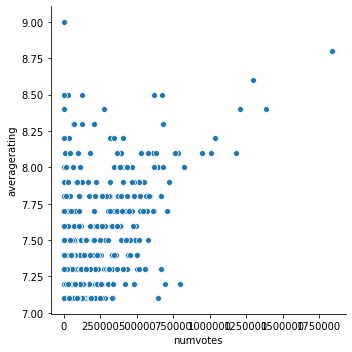

In [40]:
##Plot the data to ensure that what we're looking at makes sense
sns.relplot(x='numvotes', y='averagerating', data = HighestRated)
##Use seaborn's relplot function, defining x as average rating and y as numvotes
##to see how change in x impacts y

We used number of votes to eliminate the lower end outliers, since it doesn't take much for one person to give a movie a rating of 10. The results from that data would have distorted our desired results. We won't do anything more with the number of votes, but we can quickly observe here that only movies with ratings above 8 will garner more than 100,000 votes.

### Question 1: What is the runtime range for successful movies (rated higher than 7)?

Our original business question asked us what the runtime range was for successful movies, and while we had specified successfull as a high rating, we weren't specific. After doing some exploratory data analysis on the relevant datasets, and reading the statistical summary. We observe that out of 10, the average rating maximum is 9.2, we can use the 75% threshold observed at average rating of 7 to guide our visualizations and analysis.

Continuing to get the **runtime range**, we'll plot the data to get a sense of what we're looking at. We're going to keep average rating on the x axis, since the business goal has defined that as a variable that cannot move - we must produce a highly rated movie. We'll use the y axis for the independent variables like runtime minutes, and budget.

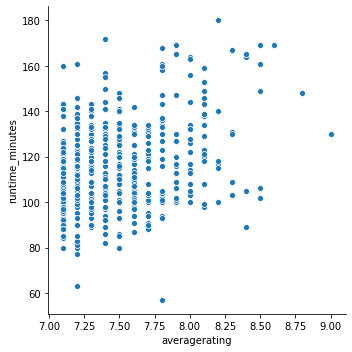

In [41]:
##Plot the data to get a general sense of what we're looking at
sns.relplot(x = 'averagerating', y = 'runtime_minutes', data = HighestRated)
plt.show()

So we have a general image of what the raw data looks like. We're going to further clean up the visualization by placing it into larger "bins". And it looks like this data might benefit from a box plot. A box plot will best demonstrate the distribution of the data. 

In [42]:
HighestRated['Bins'] = pd.cut(HighestRated.averagerating, bins = [7.0,7.5,8.0,8.5,9.0], include_lowest = True)
##First create new category called bins
##Use pandas cut function to create new bins at appropriate intervals- looks like there's nothing above 9.0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
HighestRated.head(3)
##View the head to ensure the newly added bins data is accurate

,primary_title,runtime_minutes,averagerating,numvotes,production_budget,Bins
6,The Secret Life of Walter Mitty,114.0,7.3,275300,91000000.0,"(6.999, 7.5]"
12,Tangled,100.0,7.8,366366,260000000.0,"(7.5, 8.0]"
18,Real Steel,127.0,7.1,283534,110000000.0,"(6.999, 7.5]"


In [44]:
HighestRated.Bins.value_counts()
##Look at the value counts for bins before plotting visually

(6.999, 7.5]    261
(7.5, 8.0]      115
(8.0, 8.5]       37
(8.5, 9.0]        3
Name: Bins, dtype: int64

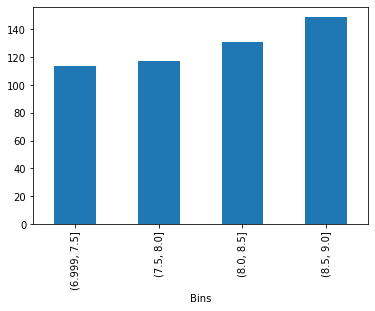

In [45]:
HighestRated.groupby('Bins')['runtime_minutes'].mean().plot.bar()
##Look at the means to determine if this will provide us with enough information to make an educated analysis.

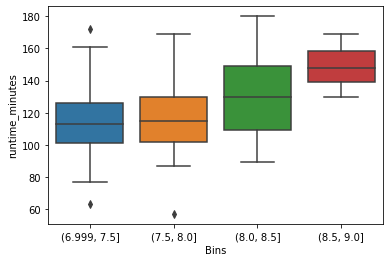

In [46]:
sns.boxplot(x = 'Bins', y = 'runtime_minutes', data = HighestRated)
##Use Seaborn's boxplot function to graph 'bins' (which was a grouping of Ratings) vs runtime minutes

This boxplot Shows us relevant information that we can convey to our stakeholders. Our original business question: **What's the ideal runtime for a highly rated movie?**

1. If we stick with the original instinctive threshold definition of "highly rated" as movies with 7+ rating, then **Microsoft could achieve that goal with a movie which ranges between 100 and 125 minutes, if they wanted to stay in the 7 - 8 rating,** and just produce a movie that people generally liked.

One caveat I'd make with that recommendation, however, is that the box plot shows a very large gap of variance: from 80 minutes to 160 minutes, with outliers at 60 minutes and 170 minutes

2. Noticing the box plot on the far right is even more enlightening - with lower variance, it shows us that movies that have achieved ratings between 8.5 and 9.0 have runtimes just under 140 minutes and just under 160 minutes. These would be the best movies (with over a certain quantity of ratings). **A second recommendation for Microsoft, then would be to produce a movie that is between 140 minutes and 160 minutes long, if they want to "go for the gold" and produce an "excellent" movie.**

The caveat here again, would be that these would be amongst the *best* movies. It's possible that Microsoft is able to produce a top-seller as their first. I would leave it up to the management team to decide which range they found optimal.

3. Finally, looking at the 8 - 8.5 range, it looks like the majority of these movies are about 110 minutes to 150 minutes. The variance is slightly less than the 7 - 8 range; however, it's not as small as the 8.5 - 9 range for average ratings. This would give us a "Goldilocks" (just right) range. I would leave the final decision up to the Microsoft management team, but it looks like **the ideal runtime range for a successful first movie is 110 minutes to 150 minutes.** This gives enough overlap between both the "good enough" range and the "excellent" range.

This of course is a wide range. However, given the multiple factors affecting the data, and other business factors beyond the scope of this analysis, I think it would be smart to allow the Microsoft management team some flexibility and options in order to weigh the pros and cons with more context.

Before we present this data, however, we'll clean up the visualization using seaborn in order to make a clearer case and not distract the decisionmakers with details.

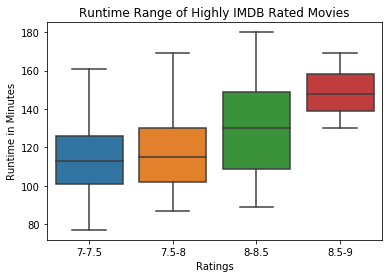

In [47]:
HighestRatedPlot = sns.boxplot(x = 'Bins', y = 'runtime_minutes', data = HighestRated, showfliers=False)
##Create boxplot, using bins as x-axis, runtime minutes as y-axis, HighestRated data, and elminating outliers
HighestRatedPlot.set_ylabel('Runtime in Minutes')
##Label y-axis 'Runtime in Minutes'
HighestRatedPlot.set_xlabel('Ratings')
##Label x-axis 'Ratings'
plt.title('Runtime Range of Highly IMDB Rated Movies')
##Title the plot 'Runtime of Highly IMDB Rated Movies'
HighestRatedPlot.set_xticklabels(['7-7.5','7.5-8', '8-8.5', '8.5-9'])
#Label the x-axis intervals
plt.show()
##Show plot without numbers on top

### Question 2: What is the optimal budget for a highly rated movie?


Now we must answer the second business question. Fortunately, the question was formulated based on similarly dependent data, so we don't need to do anymore data manipulation than we've already done. In fact, we'll use the "HighestRated" data set as-is. 

Since we've made analytical progress in being able to determine certain ranges for Microsoft to enter, it will be worth using these ranges to also answer the **question of budget**. So, again maintaining rating on the x-axis, we'll do the same analysis, but with production budget on the y-axis instead of runtime in minutes.

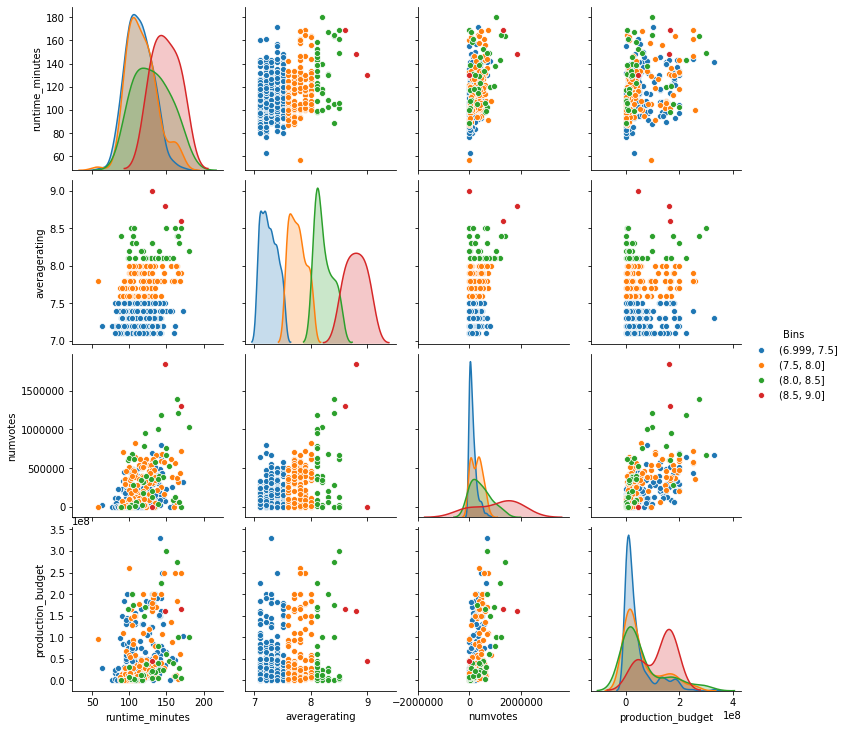

In [48]:
sns.pairplot(HighestRated, hue = 'Bins')
##Get an overall view of the relationship betweeen the ratings bins we created and the other variables
##We do this using the seaborn pairplot function

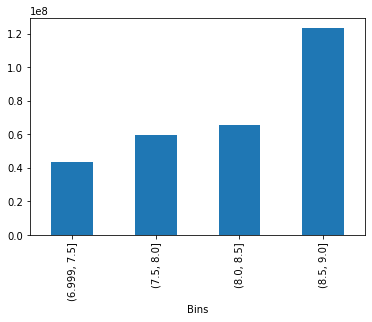

In [49]:
HighestRated.groupby('Bins')['production_budget'].mean().plot.bar()
plt.show()
##Plot ratings to see where budgets lie generally

Here, we can make the general conclusion that, for the mean of the production budgets in each bin that we've created (7-10 at intervals of .5), the excellent movies are, unsurprisingly, really expensive. Considerably more expensive to the previous movies. 

However, we can also make notice the big jump from the 8.0 - 8.5 rating range to the 8.5 - 9.0 rating range. Given that, it might make sense for us to recommend a budget that is reasonable for Microsoft. But let's find a way to demonstrate this to them. Again, since we are working with range as our desired, output, a box plot would most efficiently demonstrate that.

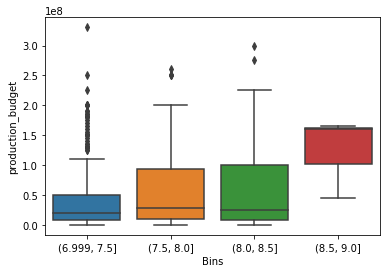

In [50]:
BudgetPlot = sns.boxplot(x = 'Bins', y = 'production_budget', data = HighestRated)
##Create a boxplot using seaborn which uses the Bins we previously created (rating groups) on the x-axis
##Place production budget on the y-xis, using HighestRated dataset

Visualizing this in box plots gives us a better idea of the range of each subset of ratings. The initial grouping of 7-7.5 doesn't really tell us too much...while the box itself shows a range between 0 and .5 (hundreds of million dollars), the variance goes just past 100 million dollars, and then has lots of outliers above that. The interesting information here is the subset of movies that make it into the "excellent" range - between 8.5 and 9.0 ratings. The best range of thes movies is between  100 and 150 million dollars. 

Combining the information derived from visualizing the production budgets data with the information derived from the movie length, we can again make two recommendations to Microsoft regarding the budget range to set aside and give to the project manager when they start:

1. For good movies, including the "Goldilocks" range we defined earlier between 8 and 8.5, Microsoft **can get away with spending less than a hundred million dollars.**

2. However, for truly **excellent movies with ratings 8.5+**, Microsoft would have to spend **between 100 and 150 million dollars**.

Let's provide a cleaner visualization to demonstrate this.

In [51]:
HighestRated['Budget'] = HighestRated.production_budget/1e6
##Modify budget column by dividing by 1 million to display cleaner numbers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
HighestRated.head()
##View the header to make sure the new column added correctly
##Be sure when displaying/labeling data that it reflects this modification

,primary_title,runtime_minutes,averagerating,numvotes,production_budget,Bins,Budget
6,The Secret Life of Walter Mitty,114.0,7.3,275300,91000000.0,"(6.999, 7.5]",91.0
12,Tangled,100.0,7.8,366366,260000000.0,"(7.5, 8.0]",260.0
18,Real Steel,127.0,7.1,283534,110000000.0,"(6.999, 7.5]",110.0
20,Toy Story 3,103.0,8.3,682218,200000000.0,"(8.0, 8.5]",200.0
21,Alita: Battle Angel,122.0,7.5,88207,170000000.0,"(6.999, 7.5]",170.0


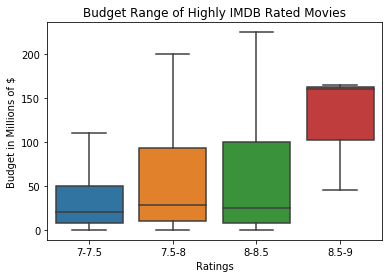

In [53]:
BudgetPlotMillions = sns.boxplot(x='Bins', y='Budget', data=HighestRated, showfliers=False)
BudgetPlotMillions.set_ylabel('Budget in Millions of $')
##Label y-axis 'Budget in Millions of $'
BudgetPlotMillions.set_xlabel('Ratings')
##Label x-axis 'Ratings'
plt.title('Budget Range of Highly IMDB Rated Movies')
##Title the plot 'Budget Range of Highly IMDB Rated Movies'
BudgetPlotMillions.set_xticklabels(['7-7.5','7.5-8', '8-8.5', '8.5-9'])
#Label the x-axis intervals

plt.show()

## Conclusion

To summarize the analytical process, we went through the following steps:

##### 1. Business Understanding
Formulated 2 specific answerable questions from Microsoft's proposition to make an entrance into the movie industry:
1. What is the optimal runtime range to create a highly rated movie?

2. What is the optimal budget range to create a highly rated movie?


##### 2. Data Understanding
After focusing those questions, we looked at the data we had and the data that would be necessary in order to best answer those questions. We determined that we would need the following:

1. Ratings
2. Budgets
3. Lengths
4. Titles

Based on these needs, we seleced three datasets: two from IMDB and one from The Numbers website. 

##### 3. Data Preparation

After deciding on and collecting the proper data, we cleaned it up using pandas in order to present the clearest case to Microsoft. Of course, in each modification we acknowledge the trade-offs we make between clean data and complete data (incomplete information, outliers, etc.). 

Once the data was cleaned, we could merge the two datasets into one simple dataset that would most efficienty show Microsoft the information they sought. So we used pandas to clean and handle the IMDB databases, merging based on the 'tconst' index which was present in both. After that, we merged the IMDB data with The Numbers data. This provided an easier dataset to work with in the next step, despite the potential loss for nuance due to data loss from duplicates, incomplete values, etc.

##### 4. Visualizations

The point of the data preparation was to prepare it for efficient analysis. The most efficient analysis occurred when we could glean information from the visualizations we create, not just the numbers and summary information given by python. 

So we returned to our business questions to guide this process. After initially looking at the brief overview visualizations, we could refine our business questions by more narrowly defining "highly rated" to 7+, with at least 100 ratings. We used matplotlib's pyplot library combined with seaborn (which is based on that library) to quickly generate these broad visualizations. After some cleanup and labeling, the visualizations allowed us to then analyze the data more effectively and provide more in-depth answers to our original business questions.


##### 5. Recommendations

The visualizations made the delivery of a customized solution to Microsoft easy:

1. Optimal runtime length is 100 - 125 minutes for the basic option (7-8 rating), 140 - 160 minutes for the premium option, and 110 - 150 minutes for the upgrade option. We provided these options so that Microsoft has the flexibility to design their investment later on down the road.

2. Optimal budget could be 25 million dollars to 100 million dollars, for the basic option or the upgrade option. The premium option would require an investment jump between 100 and 150 million dollars.


The obvious caveat is that this is just one very small pixel in the larger image that must define Microsoft's investment into the movie industry. They should ask themselves further questions including, but not limited to:

1. Content
2. Competition
3. Competitive Advantages
4. Covid19
